In [31]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest

import matplotlib.pyplot as plt
%matplotlib inline

seed = 1142

In [3]:
df=pd.read_csv("data/diabetes.csv")
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

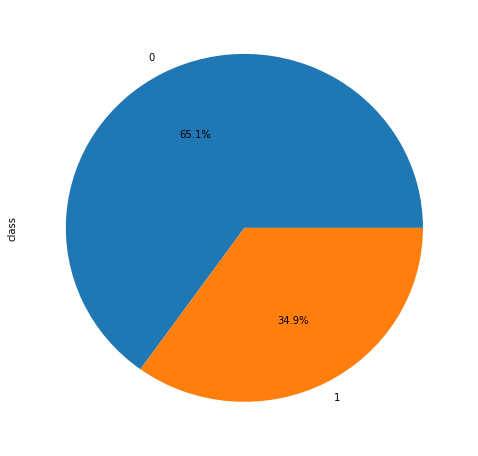

In [9]:
plt.figure(1, figsize=(8,8))
df["class"].value_counts().plot.pie(autopct="%1.1f%%")

In [10]:
df["class"].value_counts(sort=True)

0    500
1    268
Name: class, dtype: int64

In [12]:
correlation = df.corr()
correlation['class'].sort_values(ascending=False)

class    1.000000
plas     0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
test     0.130548
skin     0.074752
pres     0.065068
Name: class, dtype: float64

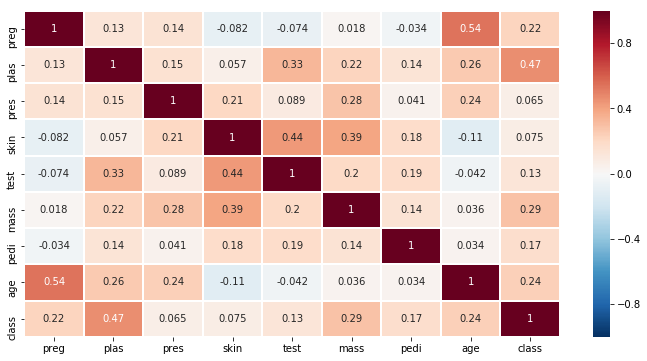

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, linewidths=1,  vmin=-1, cmap="RdBu_r")

C:\Users\sarak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sarak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\sarak\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


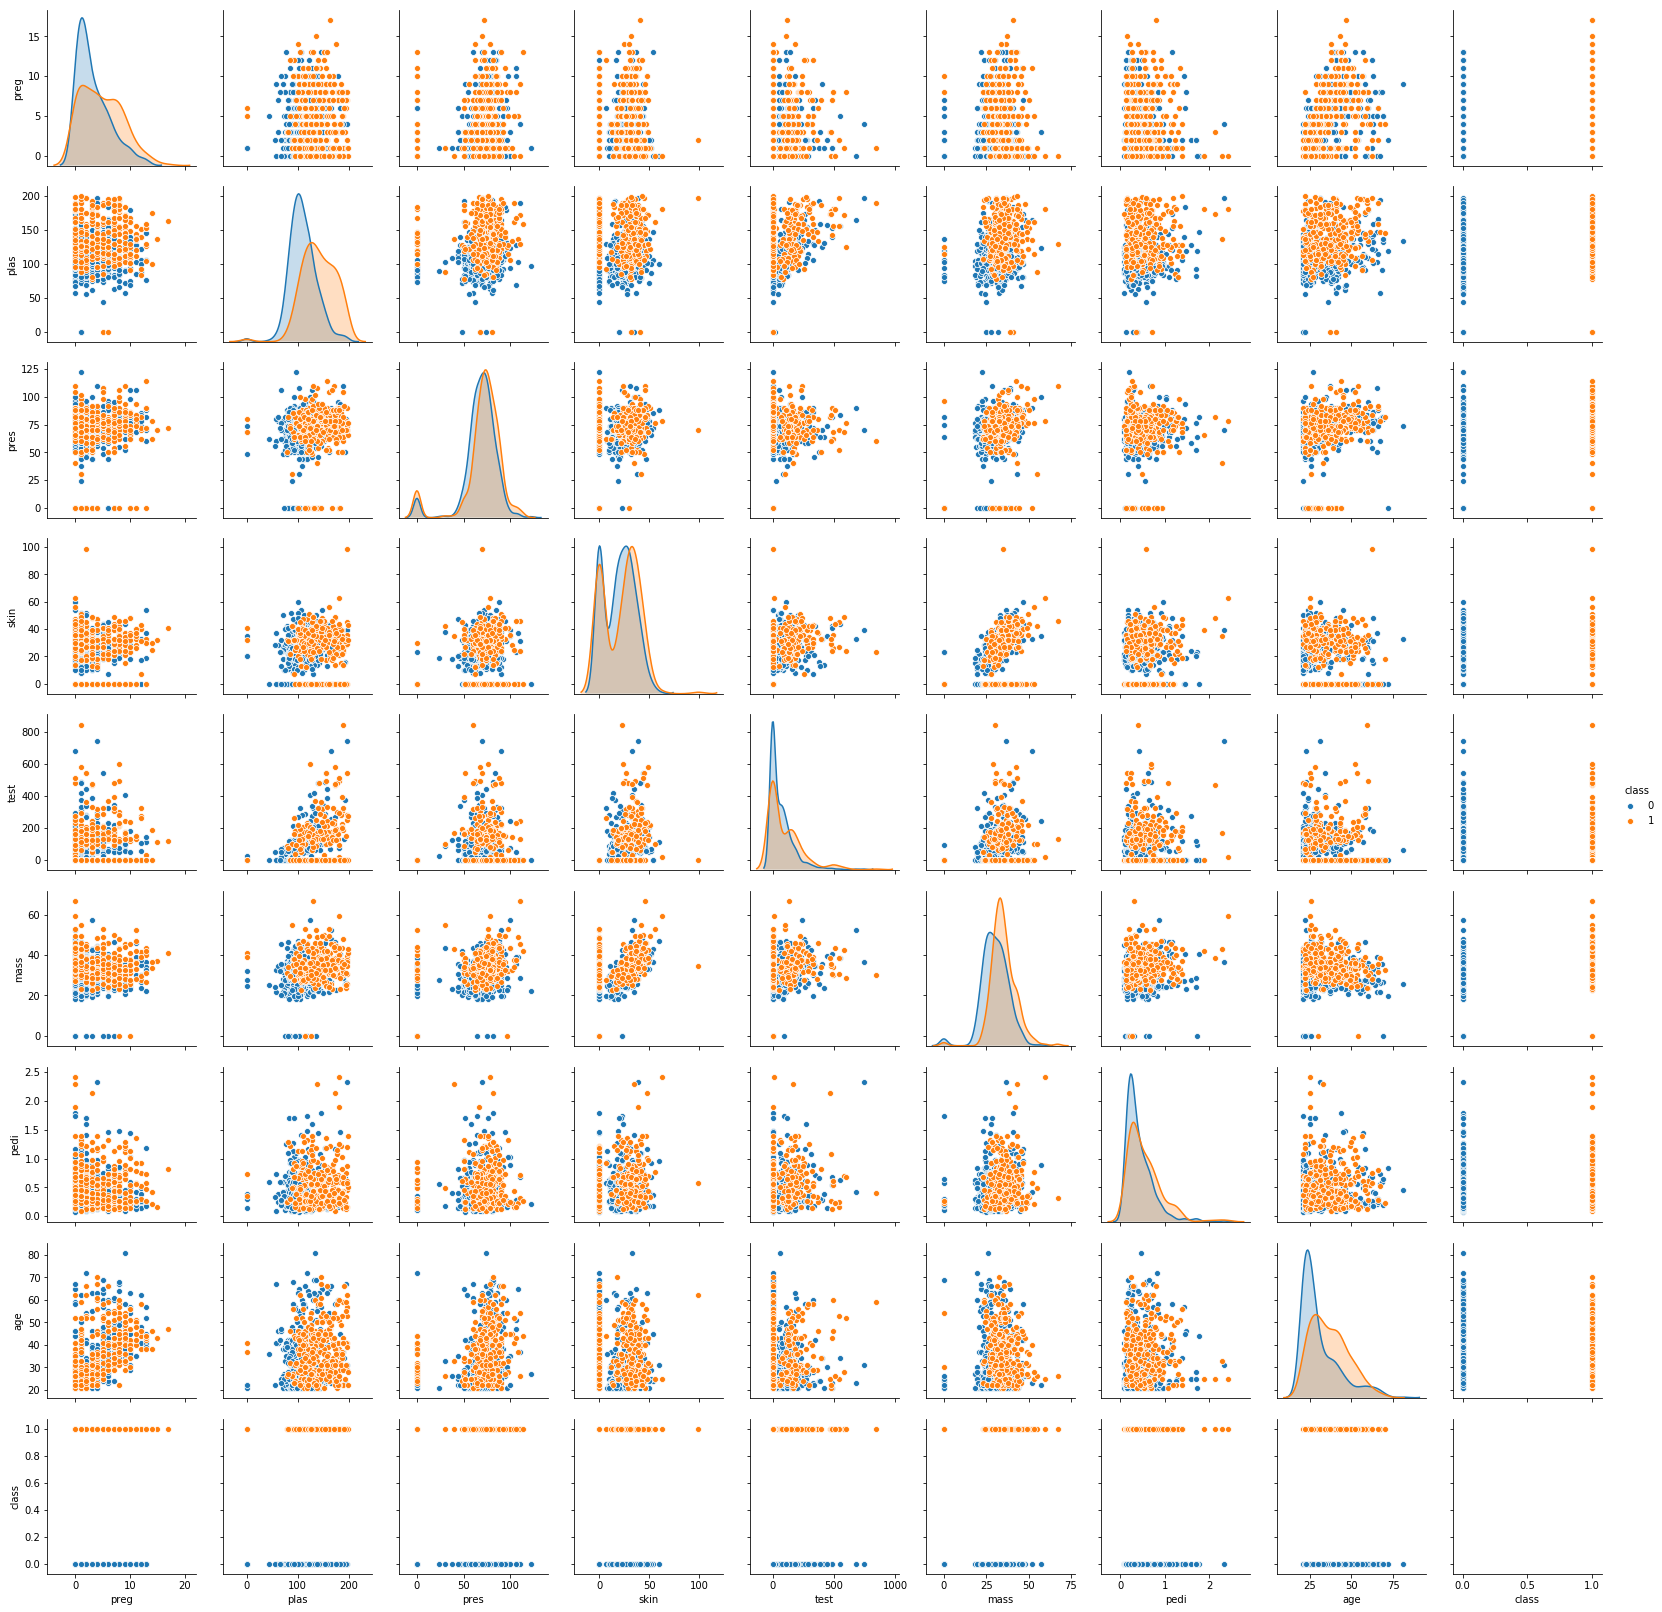

In [16]:
sns.pairplot(df, hue="class",diag_kind="kde")

In [18]:
X = df.drop("class", axis = 1)
y = df["class"]

In [24]:
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(768, 8)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=seed)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 8), (576,), (192, 8), (192,))

In [28]:
num_folds=10
kfold=KFold(n_splits=num_folds,random_state=seed)

steps=[]
steps.append(('Standardize',StandardScaler()))
steps.append(('lda',LinearDiscriminantAnalysis()))
model=Pipeline(steps)
result=cross_val_score(model,X,y,cv=kfold)
print('Pipeline LDA:',result.mean())

Pipeline LDA: 0.773462064251538


In [29]:
features=[]
features.append(('pca',PCA()))
features.append(('select_best',SelectKBest(k=6)))

In [32]:
steps=[]
steps.append(('feature_union',FeatureUnion(features)))
steps.append(('logistic',LogisticRegression()))
model=Pipeline(steps)
result=cross_val_score(model,X,y,cv=kfold)
print('Pipeline feature selection',result.mean())

Pipeline feature selection 0.7799555707450445


In [34]:
model=LogisticRegression()

result=cross_val_score(model,X,y,cv=kfold)
print('The accuracy of the k-fold classification:{0}，Standard deviation:{1}'.format(result.mean(),result.std()))

The accuracy of the k-fold classification:0.7799555707450445，Standard deviation:0.050088006076024816


In [36]:
scoring='neg_log_loss'
result=cross_val_score(model,X,y,cv=kfold,scoring=scoring)

print('logarithmic loss function:{0}，Standard deviation:{1}'.format(result.mean(),result.std()))

logarithmic loss function:-0.48432127833259997，Standard deviation:0.061229879391804784


In [38]:
result=cross_val_score(model,X,y,scoring=scoring,cv=kfold)
print('AUC:{0}，Standard deviation:{1}'.format(result.mean(),result.std()))

accuracy of the AUC graph:-0.48432127833259997，Standard deviation:0.061229879391804784


In [47]:
model=LinearRegression()
scoring='neg_mean_absolute_error'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print('MAE:{0}，Standard deviation:{1}'.format(result.mean(),result.std()))

MAE:-0.3368537167214988，Standard deviation:0.02236255320908935


In [49]:
model=LinearRegression()
scoring='neg_mean_squared_error'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print('MSE:{0}，STD:{1}'.format(result.mean(),result.std()))

MSE:-0.1628125065435654，STD:0.0221684766335819


In [51]:
model=LinearRegression()
scoring='r2'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print('r2:{0}，STD:{1}'.format(result.mean(),result.std()))

r2:0.25802999221610756，STD:0.11830205136307448


___